In [1]:
# Importation des librairies
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Using matplotlib backend: Qt5Agg


In [2]:
df = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/Classification/ChurnData.csv")

In [3]:
# Visualisation des données
df.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


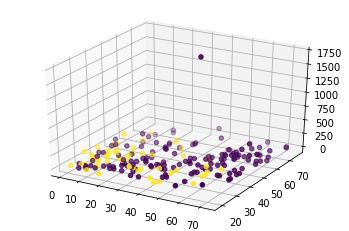

In [4]:
ax = plt.axes(projection='3d')
ax.scatter(df.tenure,df.age,df.income, c=df.churn)

In [6]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(df['churn'])
y [0:5]

array([1., 1., 0., 0., 0.])

In [8]:
# Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test


array([[ 1.36586836e+00, -1.23104871e+00, -7.66885855e-01,
        -3.51515038e-03,  1.33335087e-01, -8.94718946e-01,
         1.11301661e+00],
       [-8.77346101e-01,  6.98326718e-01,  6.28102408e-01,
        -2.46338038e-01, -6.35905798e-01, -5.49119353e-01,
         1.11301661e+00],
       [-1.29794881e+00, -1.07026743e+00, -8.74192645e-01,
        -2.60213632e-01,  1.33335087e-01, -8.94718946e-01,
        -8.98459190e-01],
       [ 1.27240109e+00,  2.86887408e+00,  9.50022776e-01,
        -2.87964819e-01,  1.33335087e-01,  9.48478883e-01,
        -8.98459190e-01],
       [ 3.84462034e-01, -9.09486141e-01, -7.66885855e-01,
        -3.01840413e-01, -1.40514668e+00,  3.72479561e-01,
        -8.98459190e-01],
       [-1.29607947e-01,  2.96373504e-01, -1.23045119e-01,
         8.63709449e-01, -6.35905798e-01,  1.63967807e+00,
        -8.98459190e-01],
       [ 1.55280290e+00,  9.39498647e-01,  6.28102408e-01,
         3.01747909e-01, -1.40514668e+00,  1.63967807e+00,
        -8.9845919

In [10]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.78

In [15]:
y_pred = classifier.predict_proba(X_test)
y_pred

array([[0.67777885, 0.32222115],
       [0.52570298, 0.47429702],
       [0.53317206, 0.46682794],
       [0.96689191, 0.03310809],
       [0.89850918, 0.10149082],
       [0.91702861, 0.08297139],
       [0.97667969, 0.02332031],
       [0.62624655, 0.37375345],
       [0.96899002, 0.03100998],
       [0.40158773, 0.59841227],
       [0.69585964, 0.30414036],
       [0.93772979, 0.06227021],
       [0.68581725, 0.31418275],
       [0.98070135, 0.01929865],
       [0.90632052, 0.09367948],
       [0.58045195, 0.41954805],
       [0.53533514, 0.46466486],
       [0.99127354, 0.00872646],
       [0.70725192, 0.29274808],
       [0.80318322, 0.19681678],
       [0.9232482 , 0.0767518 ],
       [0.76368023, 0.23631977],
       [0.89392837, 0.10607163],
       [0.5619828 , 0.4380172 ],
       [0.92008551, 0.07991449],
       [0.28367055, 0.71632945],
       [0.94764074, 0.05235926],
       [0.45998668, 0.54001332],
       [0.33298176, 0.66701824],
       [0.44253784, 0.55746216],
       [0.

In [18]:
# Matrice de confusion

cm = confusion_matrix(y_test, y_pred)
print(cm)

#print(classification_report(y_test, y_pred))

[[35  3]
 [ 8  4]]


In [13]:
# Visualiser les résultats

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

ValueError: X has 2 features per sample; expecting 7